In [9]:
# Linear Regression: L1 vs L2
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear regression via the matrix inverse.

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
print(len(x_vals))

150


In [15]:
# Declare batch size and number of iterations
batch_size = 25
learning_rate = 0.4  # Will not converge with learning rate at 0.4
iterations = 50
# Initialize placeholders
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
# Declare model operations
mode_output = tf.add(tf.matmul(x_data,A),b)
# Declare L1 loss functions
loss_L1 = tf.reduce_mean(tf.abs(y_target - mode_output))
# Declare optimizers
my_opt_L1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_L1 = my_opt_L1.minimize(loss_L1)
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [18]:
# Training loop
loss_vec_l1 = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals),batch_size)
    rand_x = np.transpose([x_vals[rand_index]])#shape=(25, 1)
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_L1,feed_dict={x_data: rand_x,y_target: rand_y})
    temp_loss_l1 = sess.run(loss_L1,feed_dict={x_data: rand_x,y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[ 1.28137493]] b = [[ 4.23752832]]
Step #50 A = [[ 1.06057501]] b = [[ 4.89352846]]
Step #75 A = [[ 0.97417498]] b = [[ 4.90952826]]
Step #100 A = [[ 0.58857489]] b = [[ 4.57352781]]


Step #25 A = [[ 433.95959473]] b = [[ 347.69277954]]
Step #50 A = [[-91342.734375]] b = [[-74822.1640625]]


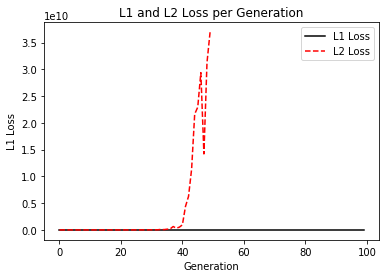

In [21]:
# L2 Loss
# Reinitialize graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare loss functions
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Declare optimizers
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

# Plot loss over time
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()
